In [1]:
import sys
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
sys.path.append('../')

from data.dataset import FunctionDataset
from model.mlp.mlp import MLP

# 1D dataset

In [2]:
def toy_dataset(x):
    return torch.exp(torch.sin(torch.pi * x[:, 0]) + x[:, 1] ** 2)

train_dataset = FunctionDataset(func=toy_dataset,
                          num_samples=1000,
                          range=[(-1, 1), (-1, 1)],
                          noise_std=0.0)

val_dataset = FunctionDataset(func=toy_dataset,
                            num_samples=200,
                            range=[(-1, 1), (-1, 1)],
                            noise_std=0.0)
test_dataset = FunctionDataset(func=toy_dataset,
                            num_samples=200,
                            range=[(-1, 1), (-1, 1)],
                            noise_std=0.0)
train_loader = train_dataset.get_dataloader(batch_size=32, shuffle=False)
val_loader = val_dataset.get_dataloader(batch_size=32, shuffle=False)
test_loader = test_dataset.get_dataloader(batch_size=32, shuffle=False)

In [3]:
model = MLP(width=[2, 10, 10, 1], activation_class=nn.Sigmoid, device='cpu')

In [4]:
train_dataset[0]

(tensor([ 0.1050, -0.7351]), tensor(2.3735))

In [5]:
def rmse_loss(output, target):
    return torch.sqrt(nn.MSELoss()(output, target))
optimizer = torch.optim.LBFGS(model.parameters(), lr = 1e-3, history_size=10, line_search_fn="strong_wolfe", tolerance_grad=1e-32, tolerance_change=1e-32)

train_loss_list, val_loss_list = model.train_model(train_loader, val_loader, optimizer, rmse_loss, epochs=100, is_lbfgs=True)


train_loss: 0.05088229046668857, val_loss: 0.0520456497158323: 100%|██████████| 100/100 [02:21<00:00,  1.42s/it]  


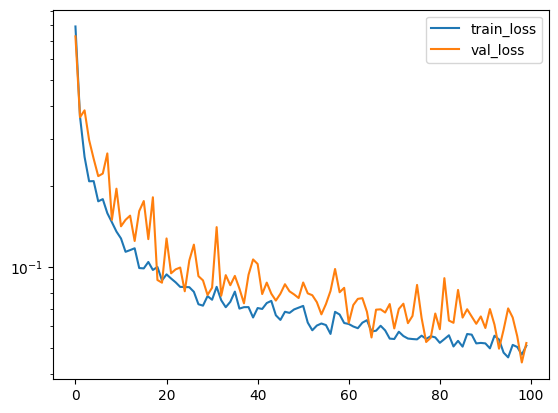

In [6]:
plt.plot([i for i in range(len(train_loss_list))], train_loss_list, label="train_loss")
plt.plot([i for i in range(len(val_loss_list))], val_loss_list, label="val_loss")
plt.yscale('log', base=10)
plt.legend()
plt.show();

In [9]:
model.test_model(test_loader, loss_func=rmse_loss)

0.05898534187248775

torch.Size([32])
torch.Size([32])


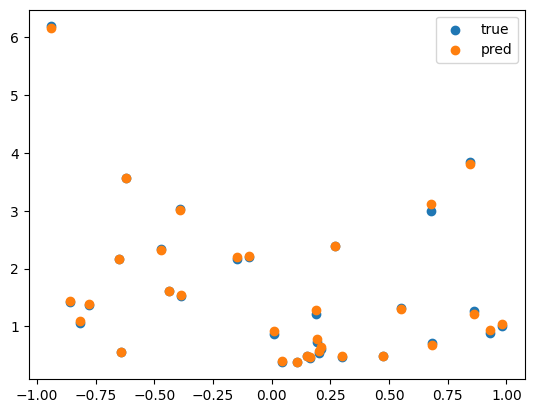

In [10]:
for x,y in test_loader:
    y_pred = model(x)
    print(y.shape)
    print(y_pred.shape)
    plt.scatter(x[:, 1], y, label="true")
    plt.scatter(x[:, 1], y_pred.detach(), label="pred")
    plt.legend()
    plt.show()
    break